In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [4]:
import io

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [6]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')


In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


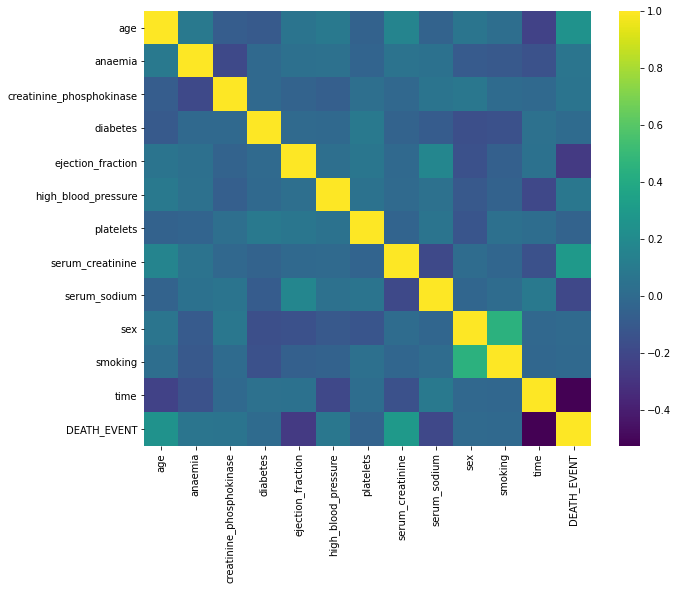

In [12]:
plt.figure(figsize = (10,8))
corr = df.corr()
sns.heatmap(corr,cmap = 'viridis')

In [13]:
#EXPLORATORY DATA ANALYSIS 

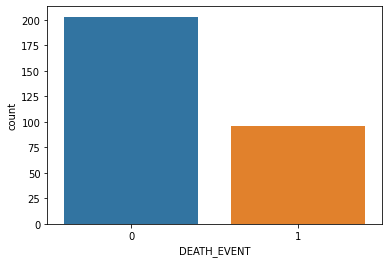

In [14]:
sns.countplot(x = 'DEATH_EVENT',data = df)

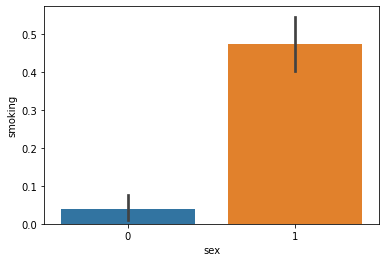

In [15]:
sns.barplot(x = 'sex',y = 'smoking',data = df)

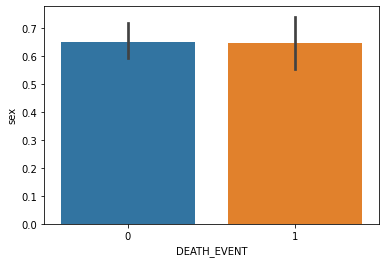

In [16]:
sns.barplot(x = 'DEATH_EVENT',y = 'sex',data = df)

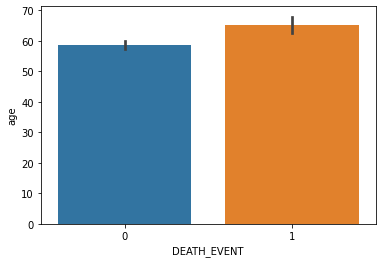

In [17]:
sns.barplot(x = 'DEATH_EVENT',y = 'age',data = df)

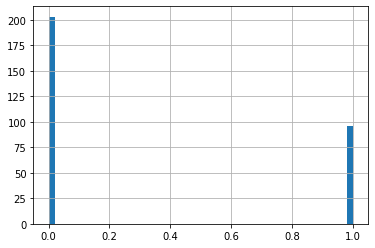

In [18]:
df['DEATH_EVENT'].hist(bins = 50)

In [19]:
df.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


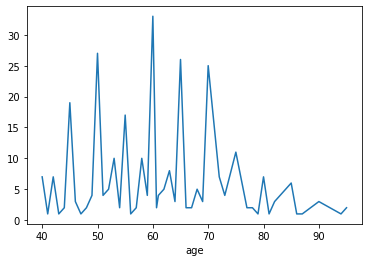

In [20]:
df.groupby('age').count()['diabetes'].plot()

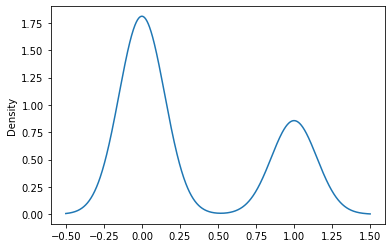

In [21]:
df['smoking'].plot.kde()

In [22]:
#train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [25]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression() 

In [29]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.coef_

array([ 8.17383450e-03,  5.98285692e-02,  6.13526914e-05,  2.28545123e-02,
       -9.55781484e-03, -5.74991281e-03,  2.45389591e-07,  9.53947611e-02,
       -2.34439521e-03, -8.22118430e-02,  1.16162533e-01, -2.59484503e-03])

In [31]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'predicted y')

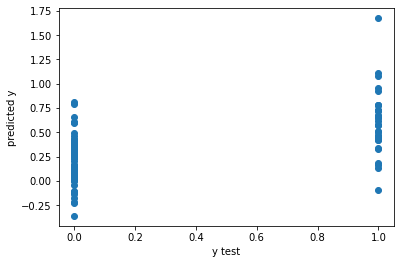

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('y test')
plt.ylabel('predicted y')

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3164743141747832
MSE: 0.15149970577430236
RMSE: 0.3892296311617377


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


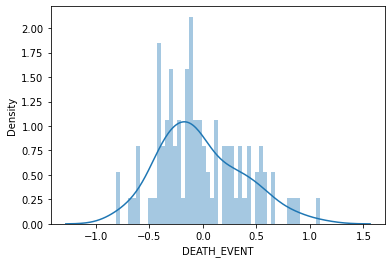

In [35]:
sns.distplot((y_test-predictions),bins=50);

In [36]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
scaler.fit(df.drop('DEATH_EVENT',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
scaled_features = scaler.transform(df.drop('DEATH_EVENT',axis = 1))


In [41]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.75      0.68      0.71        31

    accuracy                           0.83        99
   macro avg       0.80      0.79      0.79        99
weighted avg       0.82      0.83      0.83        99

[[61  7]
 [10 21]]


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
pred2 = dtree.predict(X_test)

In [53]:
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        68
           1       0.61      0.65      0.62        31

    accuracy                           0.76        99
   macro avg       0.72      0.73      0.72        99
weighted avg       0.76      0.76      0.76        99

[[55 13]
 [11 20]]


In [54]:
#improving the accuracy using ensemble techniques:

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [62]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [63]:
#bagging classifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[135   0]
 [  0  65]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    135.0  65.0       1.0      200.0         200.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[58 10]
 [ 9 22]]
ACCURACY SCORE:
0.8081
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.865672   0.687500  0.808081   0.776586      0.809881
recall      0.852941   0.709677  0.808081   0.781309      0.808081
f1-score    0.859259   0.698413  0.808081   0.778836      0.808893
support    68.000000  31.000000  0.808081  99.000000     99.000000


In [64]:
scores = { 'bagging classifier' : {
    'train': accuracy_score(y_train,bagging_clf.predict(X_train)),
    'test': accuracy_score(y_test,bagging_clf.predict(X_test))
}
          
        }

In [65]:
#extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[135   0]
 [  0  65]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    135.0  65.0       1.0      200.0         200.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[58 10]
 [ 6 25]]
ACCURACY SCORE:
0.8384
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.906250   0.714286  0.838384   0.810268      0.846140
recall      0.852941   0.806452  0.838384   0.829696      0.838384
f1-score    0.878788   0.757576  0.838384   0.818182      0.840833
support    68.000000  31.000000  0.838384  99.000000     99.000000


In [66]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [67]:
#ada boost
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[127   8]
 [  6  59]]
ACCURACY SCORE:
0.9300
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.954887   0.880597      0.93    0.917742      0.930743
recall       0.940741   0.907692      0.93    0.924217      0.930000
f1-score     0.947761   0.893939      0.93    0.920850      0.930269
support    135.000000  65.000000      0.93  200.000000    200.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[60  8]
 [13 18]]
ACCURACY SCORE:
0.7879
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.821918   0.692308  0.787879   0.757113      0.781333
recall      0.882353   0.580645  0.787879   0.731499      0.787879
f1-score    0.851064   0.631579  0.787879   0.741321      0.782336
support    68.000000  31.000000  0.787879  99.000000     99.000000


In [68]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [69]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[135   0]
 [  0  65]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    135.0  65.0       1.0      200.0         200.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[58 10]
 [11 20]]
ACCURACY SCORE:
0.7879
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.840580   0.666667  0.787879   0.753623      0.786122
recall      0.852941   0.645161  0.787879   0.749051      0.787879
f1-score    0.846715   0.655738  0.787879   0.751227      0.786914
support    68.000000  31.000000  0.787879  99.000000     99.000000


In [70]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [71]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINING RESULTS: 
CONFUSION MATRIX:
[[135   0]
 [ 21  44]]
ACCURACY SCORE:
0.8950
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.865385   1.000000     0.895    0.932692      0.909135
recall       1.000000   0.676923     0.895    0.838462      0.895000
f1-score     0.927835   0.807339     0.895    0.867587      0.888674
support    135.000000  65.000000     0.895  200.000000    200.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[63  5]
 [16 15]]
ACCURACY SCORE:
0.7879
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.797468   0.750000  0.787879   0.773734      0.782605
recall      0.926471   0.483871  0.787879   0.705171      0.787879
f1-score    0.857143   0.588235  0.787879   0.722689      0.772939
support    68.000000  31.000000  0.787879  99.000000     99.000000


In [72]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }


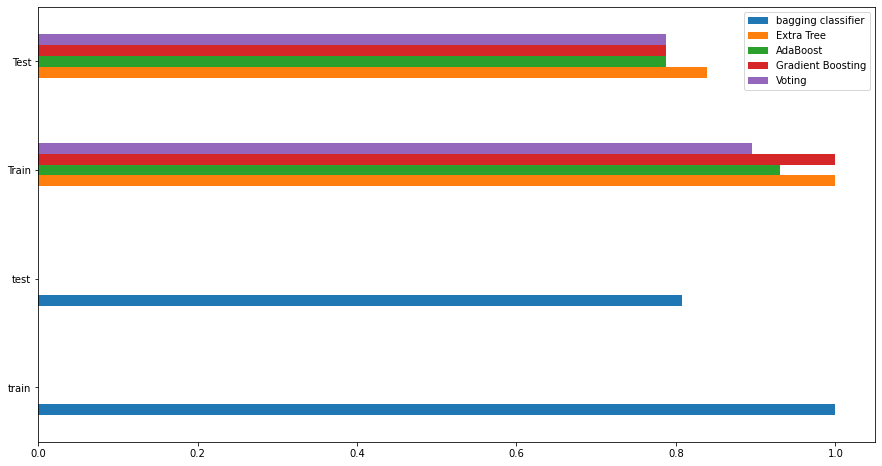

In [73]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))
